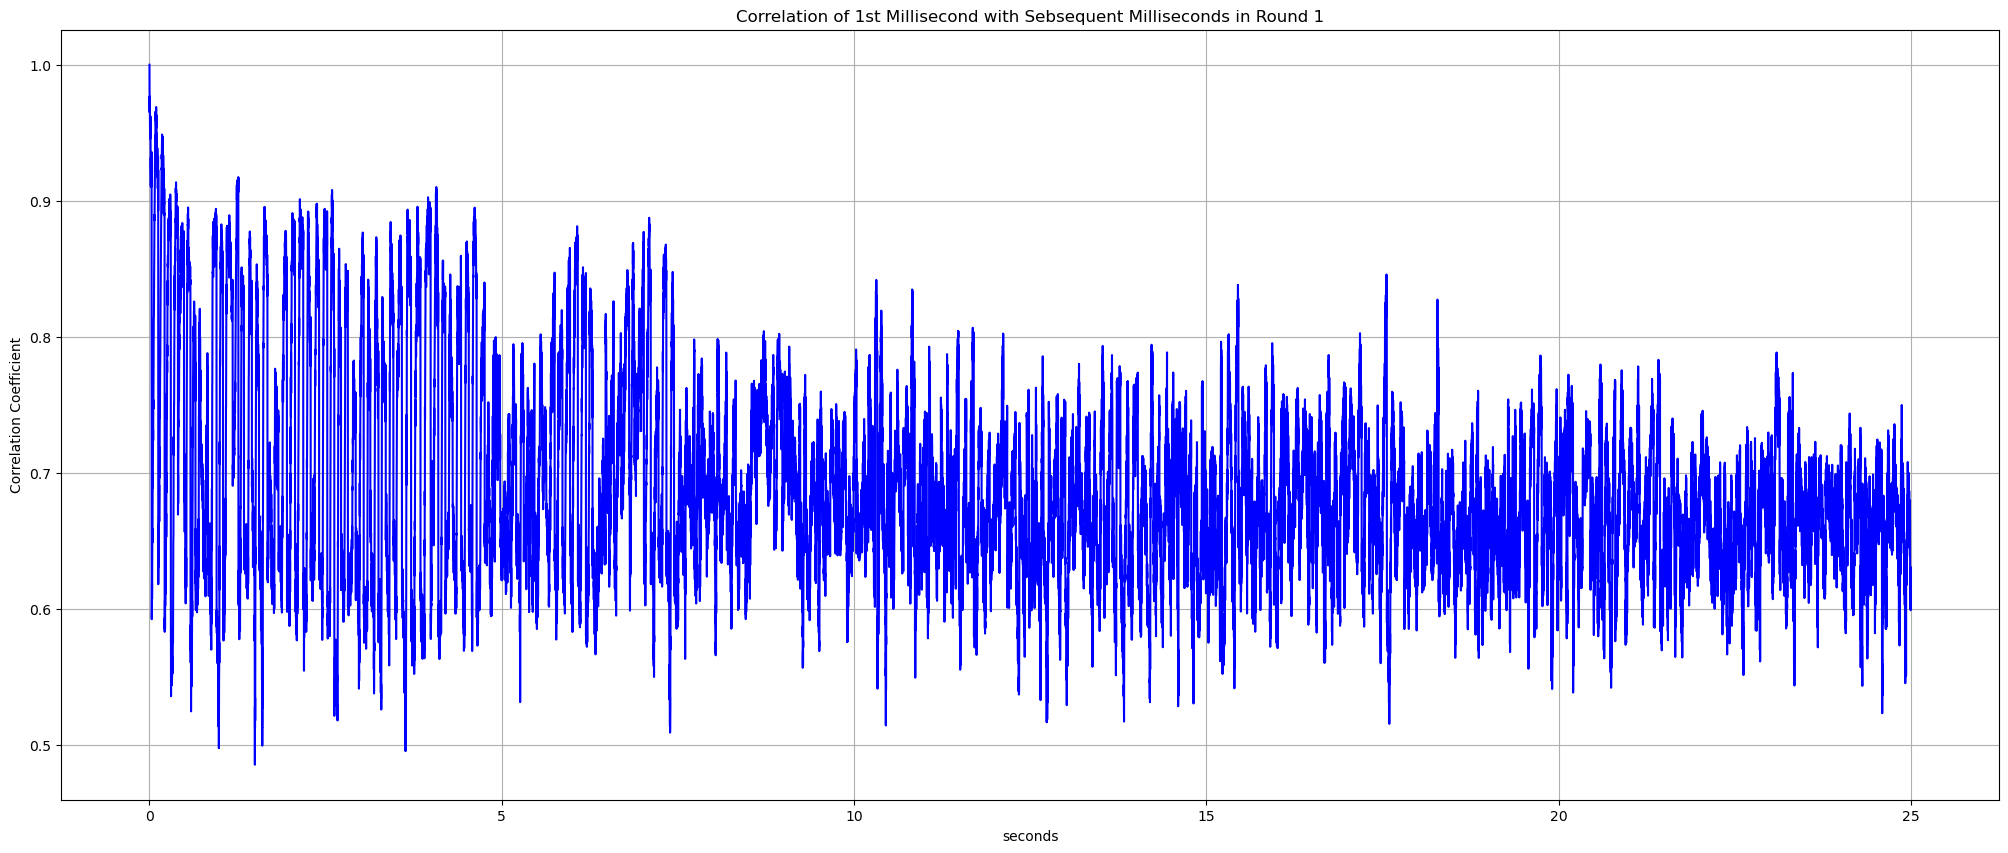

In [ ]:
#%%

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

#Inforamtionen
#load_path = "/media/campus/SEW/Bearbeitet_Data/Rx1/Tag1_Scenario1_Normal/Round_3_AP_1_RF_0_Sec_20.mat"
load_path_1 = "/media/student/SEW/Bearbeitet_Data/Rx1/Tag1_Scenario1_Normal/"
round_number = 1
#second = 10
cirs_data = []
seconds = []
data = {}
data_db = {}

#wie viele Rounds in diesem Ordner
for filenames in os.listdir(load_path_1):
    if filenames.startswith(f"Round_{round_number}_AP_1_RF_0_Sec_") and filenames.endswith(".mat"):
       r = int (filenames.split("_")[7].replace(".mat",""))
       seconds.append(r)
       
       #ordnen wie 1,2,3,...
       seconds.sort()

    
       #print (f"second ist {seconds}")
       #print(f"filename is：{filenames}")
       #print(f"repr filename： {repr(filenames)}")



#die Daten für bestimmte Round und Zeit herunterladen

for second in seconds:
   
 filename = f"Round_{round_number}_AP_1_RF_0_Sec_{second}.mat"
 full_filename = os.path.join(load_path_1,filename)
 if os.path.exists(full_filename):
        mat = scipy.io.loadmat(full_filename)
        cirs_data = mat["cirs"]
        
        # Durch jede Millisecond dB berechnen
        for ms in range(cirs_data.shape[1]):
            data_db[(second, ms)] = 10 * np.log10(np.abs(cirs_data[:, ms]))
 #data[filename] = cirs_data
 #print(filename)
 #print(data)



#Die erste 1ms
first_second_filename = f"Round_{round_number}_AP_1_RF_0_Sec_{seconds[0]}.mat"
first_millisecond_key = (seconds[0], 0)
data_first_millisecond = data_db[first_millisecond_key]


#Correlation
correlations = []

for key in data_db.keys():  
    #print(key)
    data_current_millisecond = data_db[key]
     
    
    correlation = np.corrcoef(data_first_millisecond,data_current_millisecond)
    #print(correlation[0][1])
    correlations.append(correlation[0][1])
    #print(f"correlations ist:{correlations}")
    #break


# Figur


plt.figure(figsize=(25, 10))
plt.plot(np.arange(0,len(seconds),0.001) , correlations,color='b')
plt.xlabel("seconds")
#plt.xticks(ticks=xticks,labels=x_tick_labels)        
#plt.xlim(1,len(correlations))                                                                                                     
plt.ylabel("Correlation Coefficient")
#plt.ylim(0.999,1.0001)
#plt.yticks(yticks)
plt.title(f"Correlation of 1st Millisecond with Sebsequent Milliseconds in Round {round_number}")
plt.grid(True)
plt.show()